In [10]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [12]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [13]:
html = browser.html
soup = bs(html, 'html.parser')

In [15]:
results = soup.find('table', class_='table')
headers = soup.find_all('th')
info = soup.find_all('tr', class_='data-row')

In [16]:
table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

In [17]:
for header in headers:
    table_headers.append(header.text)
    
# retrieve all data
for i in info:
    
    # retrieve and append id
    mars_id = i.find('td')
    id.append(int(mars_id.text))
    
    # retrieve and append terrestial dates
    terrestrial_date.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    # retrieve and append sol
    sol.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # retrieve and append ls
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling('td')
    
    # retrieve and append month
    month.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # retrieve and append min_temp
    min_temp.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # retrieve and append pressure
    pressure.append(float(mars_id.find_next_sibling("td").text))

In [19]:
mars_df = pd.DataFrame(columns = table_headers)
mars_df["id"] = id
mars_df["terrestrial_date"] = terrestrial_date
mars_df["sol"] = sol
mars_df["ls"] = ls
mars_df["month"] = month
mars_df["min_temp"] = min_temp
mars_df["pressure"] = pressure
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [20]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [21]:
mars_df = mars_df.astype({'terrestrial_date':'datetime64'})

In [22]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [23]:
#How many months exist on Mars?
mars_month = mars_df["month"].max()
print(f'There are {mars_month} months on Mars.')

There are 12 months on Mars.


In [24]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
data_days = mars_df['sol'].nunique()
print(f"There are {data_days} Martian days' worth of data in the dataset.")


There are 1867 Martian days' worth of data in the dataset.


The 3rd month is the coldest and the 8th month is the warmest.


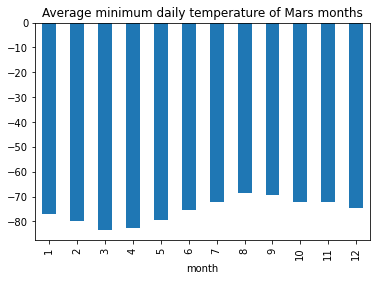

In [26]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question

average_temp = mars_df.groupby(['month'])['min_temp'].mean()
print(f'The 3rd month is the coldest and the 8th month is the warmest.')

# plotting the results as a bar chart
average_temp.plot.bar(x='Month', y='Temperature (C)', title='Average minimum daily temperature of Mars months');

The 6th month is the lowest and the 9th month is the highest atmospheric pressure.


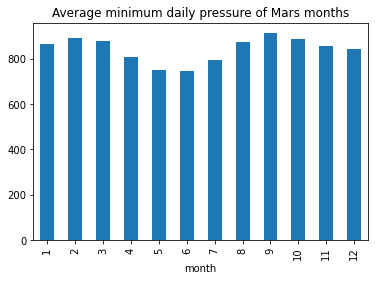

In [28]:
#Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
average_pressure = mars_df.groupby(['month'])['pressure'].mean()
print(f'The 6th month is the lowest and the 9th month is the highest atmospheric pressure.')

# plotting the results as a bar chart
average_pressure.plot.bar(x='Month', y='Average pressure (C)', title='Average minimum daily pressure of Mars months');

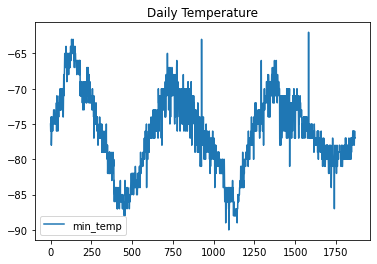

In [32]:
#5. About how many terrestrial (Earth) days exist in a Martian year?

min_temp = mars_df[['min_temp']]
min_temp.plot(title='Daily Temperature');



In [33]:
mars_min_temp = mars_df[['min_temp', 'sol']]
mars_min_temp_sorted = mars_min_temp.sort_values('min_temp', ascending=False)
days_in_mars_year = mars_min_temp_sorted.index[0] - mars_min_temp_sorted.index[1]

In [34]:
print( f"The solar days (sol) between the top two peak temperatures is considered to be a year roughly. Here, the top two peak temperatures are on sols {mars_min_temp_sorted.index[0]} and {mars_min_temp_sorted.index[1]} respectively.")

The solar days (sol) between the top two peak temperatures is considered to be a year roughly. Here, the top two peak temperatures are on sols 1582 and 926 respectively.


In [38]:
csv_file = "output_data/mars_data.csv"

mars_df.to_csv(csv_file, header=True, index=False)

In [39]:
browser.quit()